<a href="https://colab.research.google.com/github/MithunSR/Gradient_Descent_Tutorial/blob/main/Introduction__Gradient_descent_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent (SGD) is a popular optimization algorithm commonly used to train machine learning models, including neural networks. It is especially useful when dealing with large datasets, as it performs updates on small subsets of the training data, known as mini-batches, making it computationally efficient.

Algorithm Overview:
The SGD algorithm iteratively updates the model's parameters to minimize a given loss function. Here's a high-level overview of the SGD algorithm:

Initialize the model's parameters (weights and biases).
Shuffle the training data.
Split the training data into mini-batches.
For each mini-batch:
Compute the gradients of the loss function with respect to the parameters using the mini-batch data.
Update the parameters by taking a step in the opposite direction of the gradients, multiplied by a learning rate.
Repeat steps 4 for a fixed number of epochs or until convergence.
Updating Parameters:
The update step in SGD involves adjusting the model's parameters based on the computed gradients. The update rule for a parameter θ at iteration t is given by the formula:

$θ(t+1) = θ(t) - learning\_rate \times gradient$

Here, learning_rate represents the step size that determines the magnitude of the parameter update, and gradient represents the derivative of the loss function with respect to the parameter.





**Algorithm Overview** 

 The SGD algorithm iteratively updates the model's parameters to minimize a given loss function. Here's a high-level overview of the SGD algorithm:

>1.Initialize the model's parameters (weights and biases). 

>2.Shuffle the training data. 

>3.Split the training data into mini-batches. 

>4.For each mini-batch: 



>>*   Compute the gradients of the loss function with respect to the parameters using the mini-batch data.
*   Update the parameters by taking a step in the opposite direction of the gradients, multiplied by a learning rate.

>5.Repeat steps 4 for a fixed number of epochs or until convergence.

**Updating Parameter**

The update step in SGD involves adjusting the model's parameters based on the computed gradients. The update rule for a parameter θ at iteration t is given by the formula:

$θ(t+1) = θ(t) - learning\_rate \times gradient$

Here, learning_rate represents the step size that determines the magnitude of the parameter update, and gradient represents the derivative of the loss function with respect to the parameter.

**Learning Rate**

The learning rate is a hyperparameter that controls the step size during parameter updates. Choosing an appropriate learning rate is crucial for successful training. If the learning rate is too small, the algorithm may converge slowly. On the other hand, if the learning rate is too large, the algorithm may fail to converge or overshoot the optimal solution.

**Batch Size**
In SGD, the training data is divided into mini-batches for computing the gradients and updating the parameters. The batch size determines the number of samples used in each iteration. A smaller batch size introduces more randomness into the parameter updates but may result in noisy gradients. Conversely, a larger batch size provides a more accurate estimate of the gradients but requires more memory and computational resources.

**Conclusion**
Stochastic Gradient Descent (SGD) is a widely used optimization algorithm for training machine learning models. It efficiently updates the model's parameters using mini-batches of data, making it suitable for large-scale datasets. Choosing an appropriate learning rate and batch size are crucial for successful training and convergence.

#Using gradient descent to train a neural network for image classification.

##Loading the CIFAR-10 Dataset:

The CIFAR-10 dataset is loaded using the cifar10.load_data() function.
It splits the dataset into training and testing sets, returning four NumPy arrays: x_train, y_train, x_test, and y_test.
The images are loaded as 32x32 RGB images, and the pixel values are in the range [0, 255].

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
if tf.test.gpu_device_name():
    print('GPU is available')
    device_name = tf.test.gpu_device_name()
else:
    print("GPU is not available. Switching to CPU.")
    device_name = '/device:CPU:0'

GPU is available


In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


##Normalizing the Pixel Values:

The pixel values of the images are normalized between 0 and 1 by dividing them by 255.0.
This step ensures that the input data is in a suitable range for training the neural network.

In [4]:
# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

##One-Hot Encoding Labels:

The labels (y_train and y_test) are one-hot encoded using tf.keras.utils.to_categorical.
This converts the labels from a single integer representing the class to a binary matrix representation.
Each row in the matrix represents a sample, and the columns represent the classes.
The value 1 is assigned to the column corresponding to the true class, and all other columns are filled with 0s.

In [5]:
# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

##Define Model

A sequential model is created using Sequential() from the Keras API.
A sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
The layers are added to this model one by one.

The first layer of the model is a flatten layer (Flatten()).
It reshapes the input images from a 3D shape (32x32x3) to a 1D shape (3072).
This allows the subsequent fully connected layers to process the input as a vector.

A fully connected hidden layer is added to the model using Dense().
It has 128 units/neurons and uses the ReLU activation function.
This layer will learn to extract features from the flattened input images.

The output layer is added using Dense().
It has 10 units, representing the 10 classes in the CIFAR-10 dataset.
The softmax activation function is used to convert the output values into probabilities.

In [6]:
# Create a sequential model
model = Sequential()

# Flatten the input images
model.add(Flatten(input_shape=(32, 32, 3)))

# Add a fully connected hidden layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))


In [7]:
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

##Train Model

In [8]:
# Train the model
with tf.device(device_name):
    history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), verbose=2)


Epoch 1/10
782/782 - 7s - loss: 1.9396 - accuracy: 0.3052 - val_loss: 1.9001 - val_accuracy: 0.3267 - 7s/epoch - 9ms/step
Epoch 2/10
782/782 - 2s - loss: 1.7889 - accuracy: 0.3716 - val_loss: 1.8356 - val_accuracy: 0.3539 - 2s/epoch - 3ms/step
Epoch 3/10
782/782 - 3s - loss: 1.7225 - accuracy: 0.3947 - val_loss: 1.9028 - val_accuracy: 0.3217 - 3s/epoch - 4ms/step
Epoch 4/10
782/782 - 3s - loss: 1.6697 - accuracy: 0.4144 - val_loss: 1.7799 - val_accuracy: 0.3595 - 3s/epoch - 3ms/step
Epoch 5/10
782/782 - 2s - loss: 1.6326 - accuracy: 0.4280 - val_loss: 1.6658 - val_accuracy: 0.4043 - 2s/epoch - 3ms/step
Epoch 6/10
782/782 - 3s - loss: 1.6005 - accuracy: 0.4403 - val_loss: 1.6758 - val_accuracy: 0.4042 - 3s/epoch - 3ms/step
Epoch 7/10
782/782 - 2s - loss: 1.5725 - accuracy: 0.4499 - val_loss: 1.6684 - val_accuracy: 0.4094 - 2s/epoch - 3ms/step
Epoch 8/10
782/782 - 3s - loss: 1.5524 - accuracy: 0.4559 - val_loss: 1.6016 - val_accuracy: 0.4353 - 3s/epoch - 4ms/step
Epoch 9/10
782/782 - 2s 

##Evaluate Model

In [9]:
# Evaluate the model
with tf.device(device_name):
    loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 1.6748 - accuracy: 0.3959
Test loss: 1.6748
Test accuracy: 0.3959


##Plotting the Training and Validation Loss:

By setting verbose=2, you can observe the progress of gradient descent during training, including the decrease in loss and the improvement in accuracy over epochs. This helps in understanding how the model's weights are being updated and how the performance improves over time.

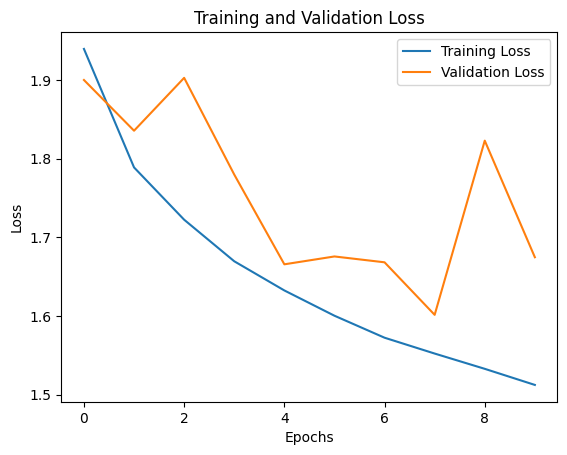

In [10]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

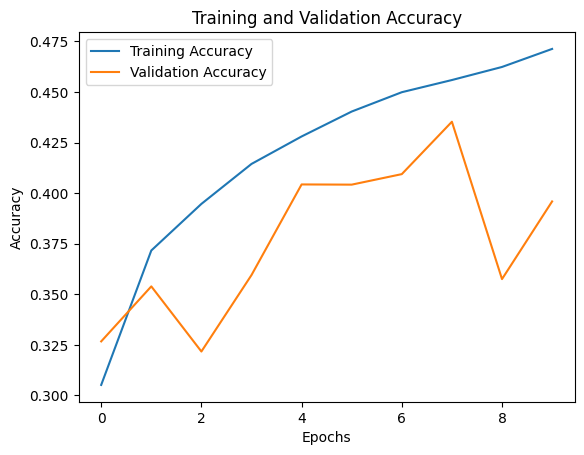

In [11]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()